# Prova - Reconhecimento de padrões

#Discentes: Bruno Senna e Iuri Rodrigo
#Docente: Ilan Sousa Figueiredo

## Prosposta:
### Faça uma breve análise exploratória dos dados (exibir graficamente a distribuição de pontos de todos os atributos, verificar correlação entre os atributos, calcular média, mediana, desvio padrão de cada atributo)
### Implemente a ideia de inercia para escolha da quantidade inicial de clusters. Justificar a escolha do K com base na interpretação do gráfico de Elbow.
### Ao final, calcule a matriz de confusão, acurácia, precision, recall e specificity sobre o dataset

### Implemente em Python, no Jupyter, mostrando os resultados em gráficos e tabelas

In [ ]:
# Importando bibliotecas a serem utilizadas:

import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando o make_blobs:

from sklearn.datasets import make_blobs

centers = [[1,1], [-1,-1], [1,-1]]
n_samples = 750
X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=0)

In [ ]:
# Pritando o shape dos dados, indicando a quantidade e o número de colunas:

print(X.shape)


(750, 2)


In [ ]:
# Pritando os dados:

X

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       ...,
       [ 0.26798858, -1.27833405],
       [-0.88628813, -0.30293249],
       [ 0.60046048, -1.29605472]])

In [ ]:
# Pritando as labels:

y = labels_true
y

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

# Análise exploratória

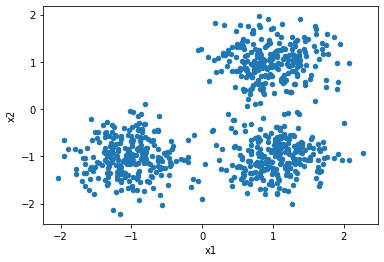

In [ ]:
# Plotando a distribuição dos dados

%matplotlib inline

from pandas import DataFrame

data = DataFrame(X, columns=["x1", "x2"])
data.plot.scatter("x1", "x2")

In [ ]:
#  Usando o describe() para mostrar a Média, mediana e o desvio padrão de cada atributo:

data.describe()


# Count = quantidade de elementos;
# mean = média
# std = desvio padrão
# min = mínimo valor
# 50% (segundo quartil) = mediana
# max = máximo valor

,x1,x2
count,750.000000,750.000000
mean,0.327286,-0.343637
std,1.038473,1.028660
min,-2.033119,-2.218457
25%,-0.805860,-1.142937
50%,0.730641,-0.764607
75%,1.135494,0.738344
max,2.268390,1.964981


     |████████████████████████████████| 15.1 MB 167 kB/s 


                                             |          | [  0%]   00:00 -> (? left)


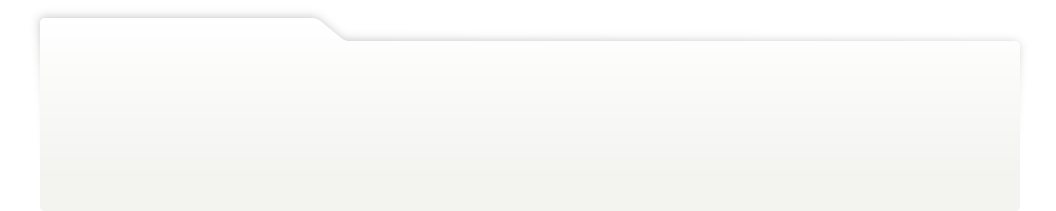
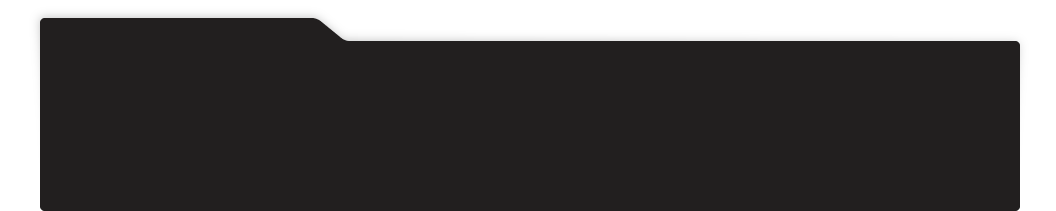
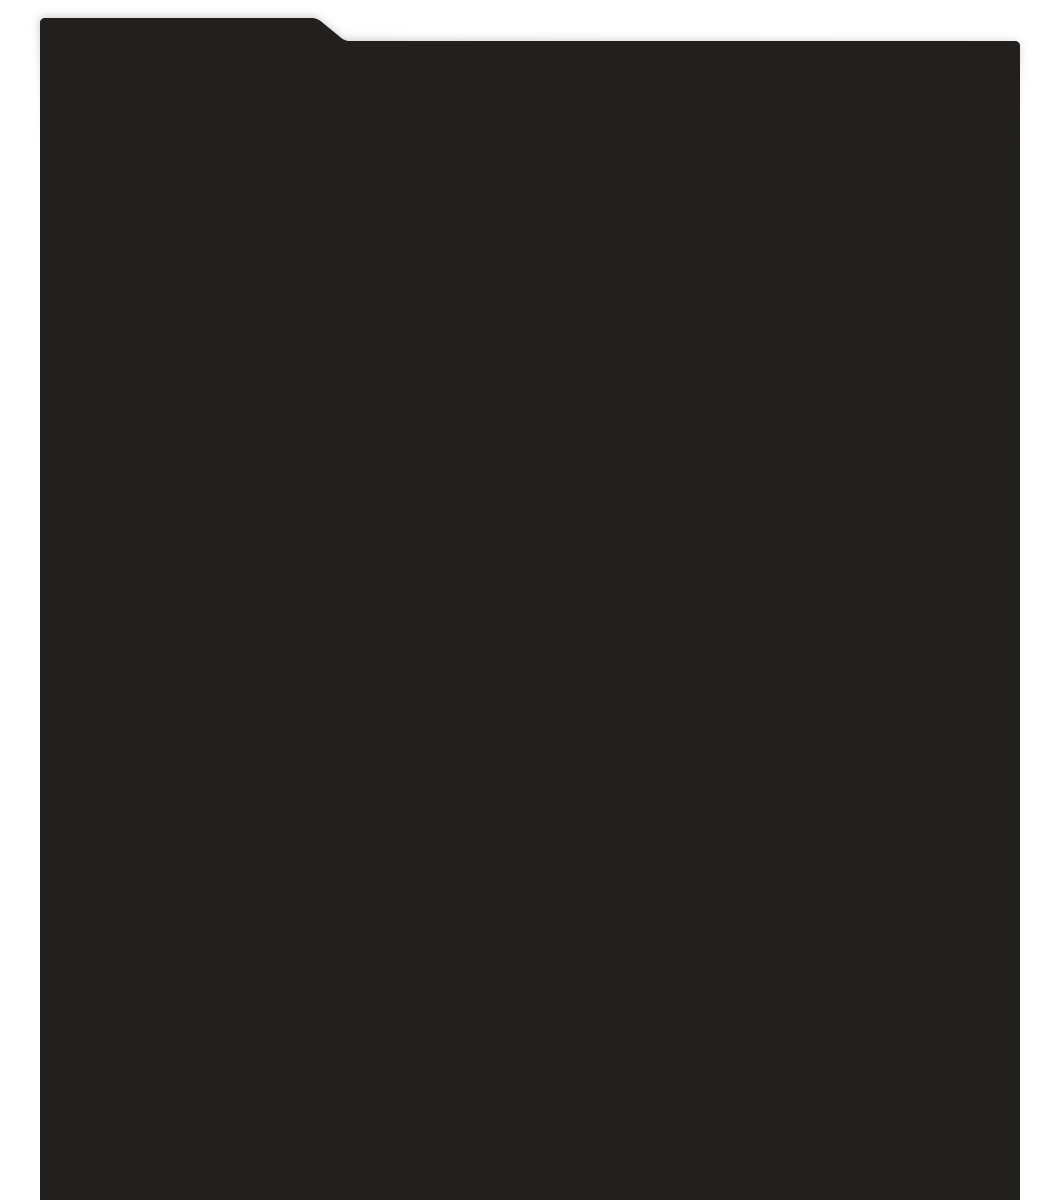
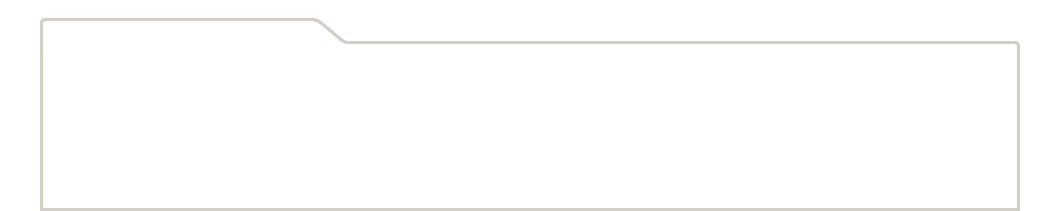
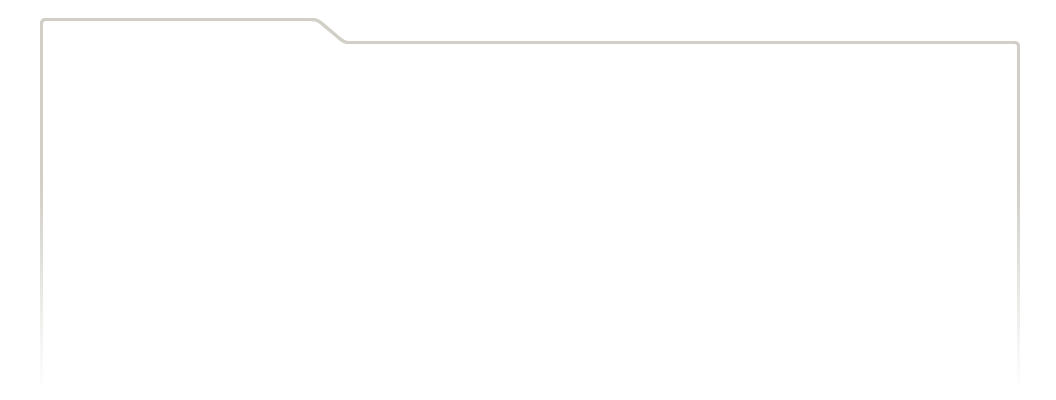
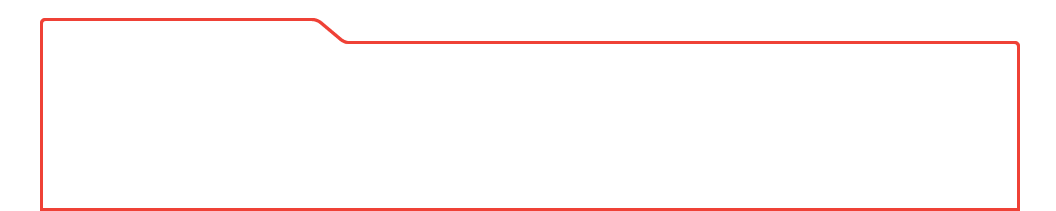
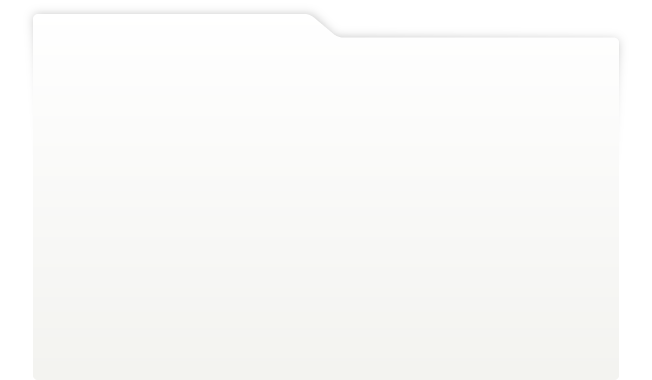
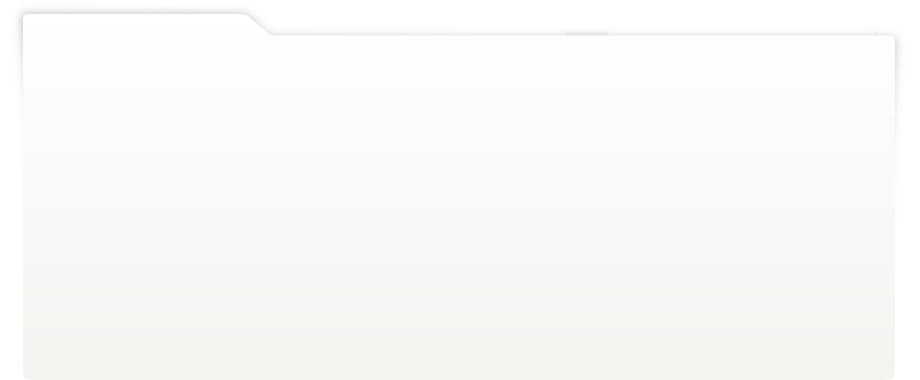
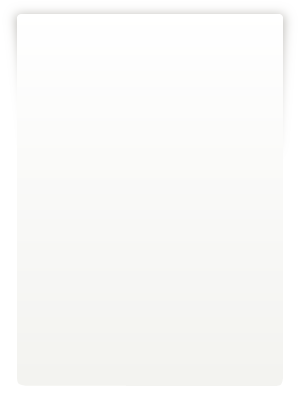
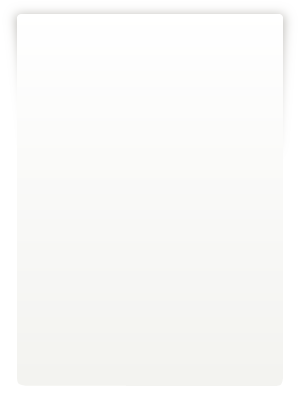
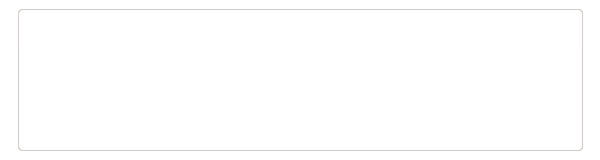
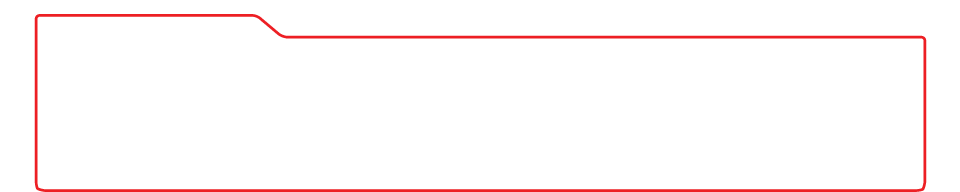
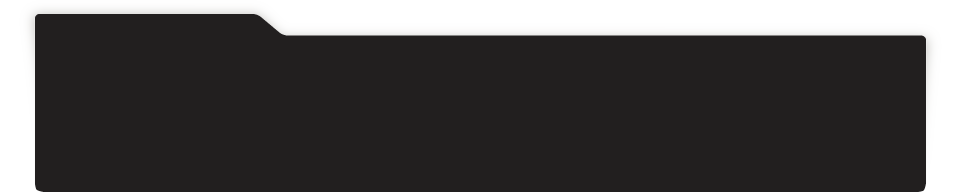
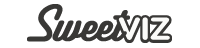
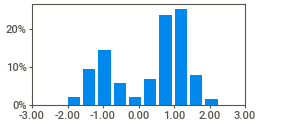
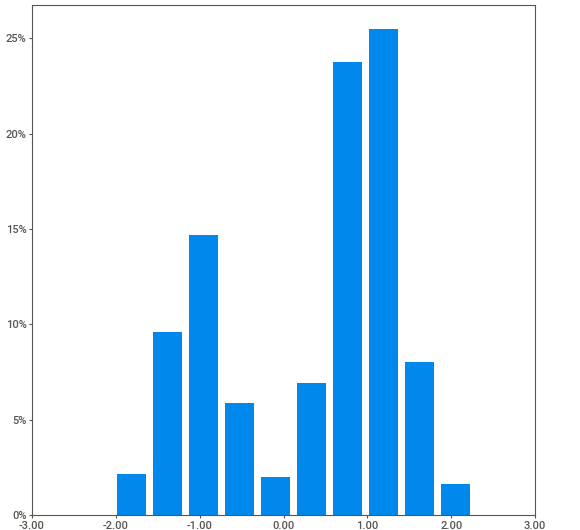
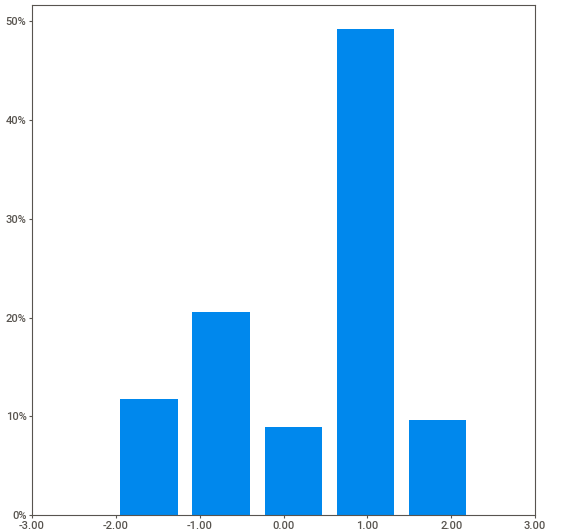
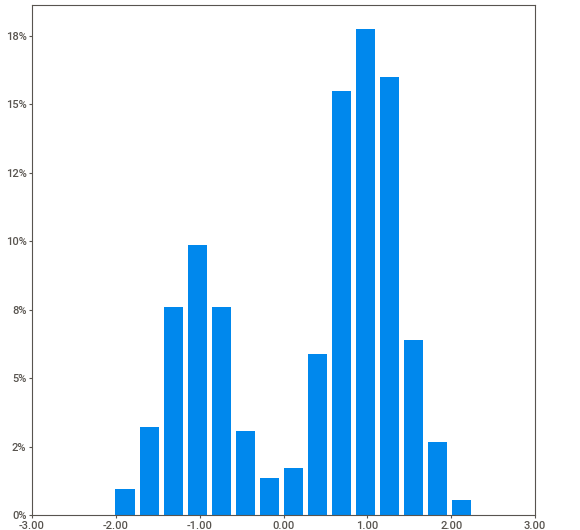
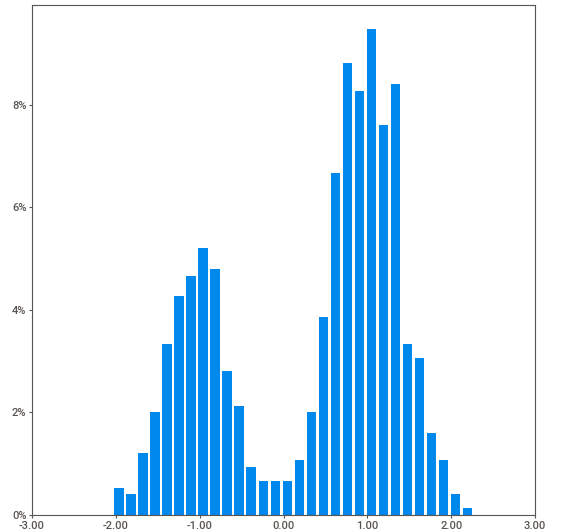
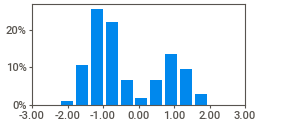
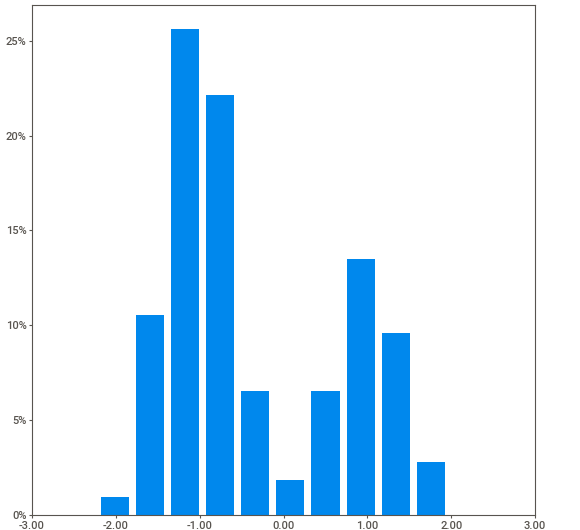
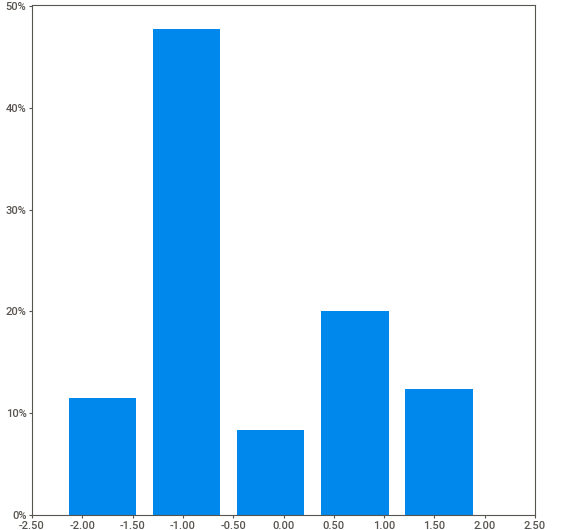
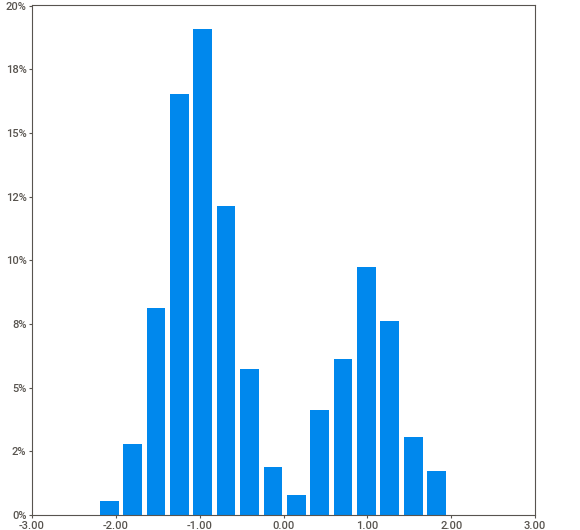
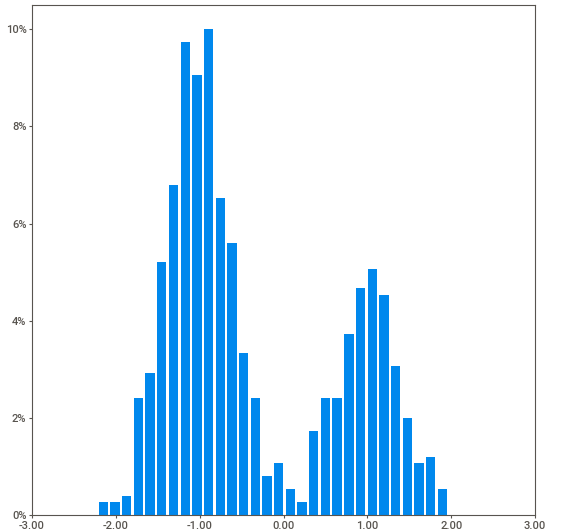
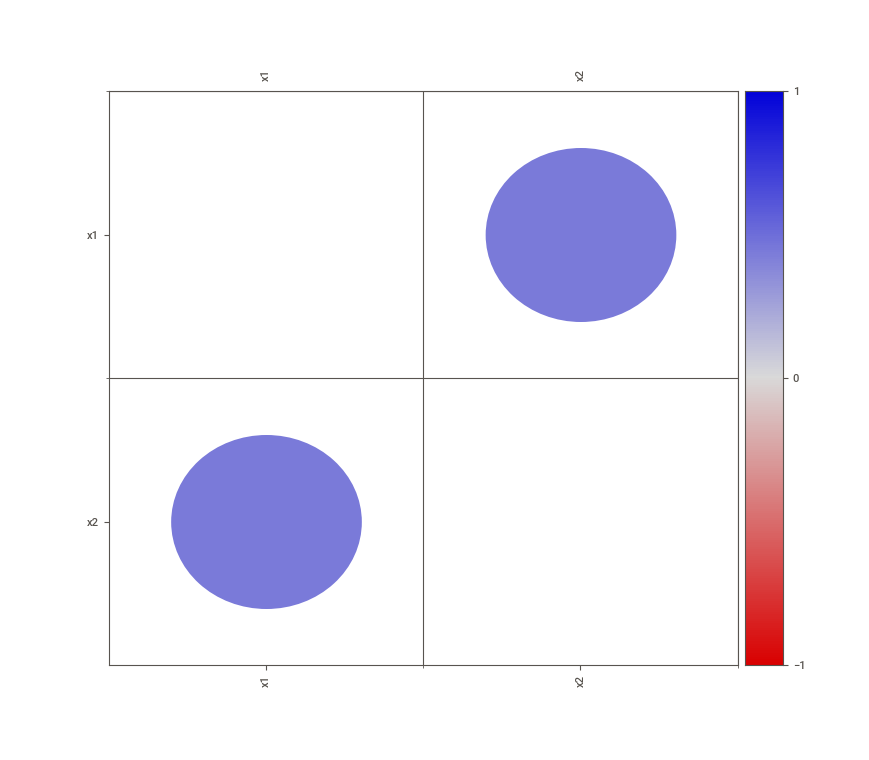
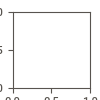

In [ ]:
# Análise exploratória profunda com uso da biblioteca sweetviz, com associações de atributos e respectivas estatísticas de cada coluna.
# A biblioteca também mostra as medidas de tendencia central e dispersão:

# Instalando a biblioteca

!pip install sweetviz
import sweetviz as sv

# Cria o reporte e chama de my_report
my_report = sv.analyze(data)

# gráfico no própio notebook
my_report.show_notebook()

# Clicar em "Associations" para maior análise gráfica

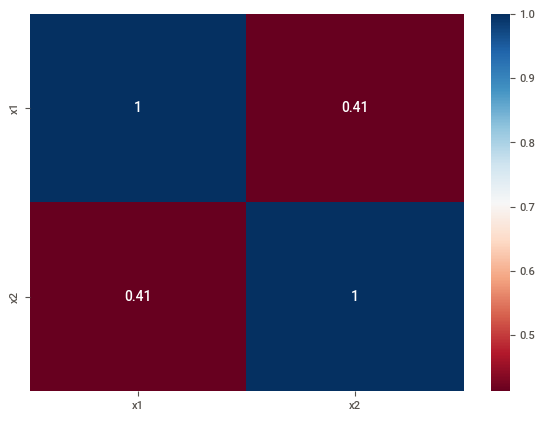

In [ ]:
# Correlação entre os atributos.

# Analisando a relação dos atributos sobre eles mesmos(Matriz de correlação):

plt.figure(figsize=(7,5))
ax = sns.heatmap(data.corr(), cmap='RdBu', annot=True)
plt.show()

# Gráfico cotovelo(Elbow)

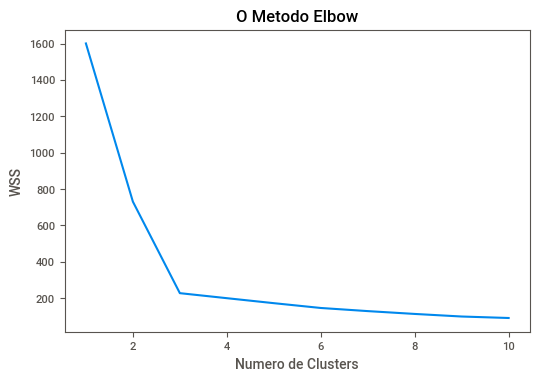

In [ ]:
# Método Elbow
# Criando uma lista para armazenar os valores do kmeans com a inércia e utilizando o for para realizar iterações.
# Por meio do gráfico, analisa-se qual o melhor valor de K através da estabilização da curva:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

# K-means

In [ ]:
# Importando a biblioteca e executando o .fit nos dados.




kmeans = KMeans(n_clusters=3).fit(X) # Alterando o número de clusters, é possível saber qual a melhor opção para clusterizar, tanto analianso o gráfico quanto a matriz de confusão abaixo.

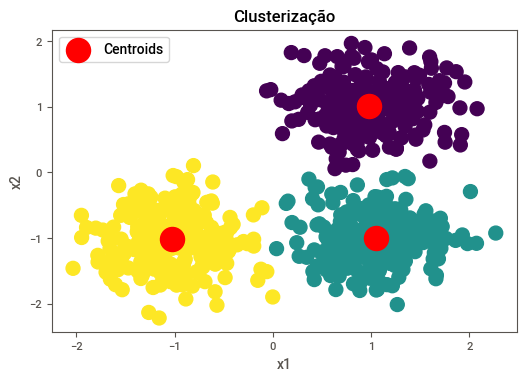

In [ ]:
# Com o gráfico, percebe-se a dispersão dos pontos


plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Clusterização')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

In [ ]:
# Executando a predição com o clusterizador:

predict = kmeans.predict(X)

In [ ]:
# Mostrando a Matriz de confusão:

from sklearn.metrics import classification_report

print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       250
           1       0.00      0.00      0.00       250
           2       0.01      0.01      0.01       250

    accuracy                           0.33       750
   macro avg       0.34      0.33      0.34       750
weighted avg       0.34      0.33      0.34       750

